In [18]:
import numpy as np
import matplotlib.pyplot as plt
import linelist as ls
from scipy.optimize import curve_fit
from scipy.special import wofz
# from lmfit.models import VoigtModel
import astropy.units as u
from scipy.signal import savgol_filter

+--------+--------------+--------+-----------+
| Line   |   Wavelength |      f |     Gamma |
|--------+--------------+--------+-----------|
| Lya    |      1215.67 | 0.4164 | 6.265e+08 |
+--------+--------------+--------+-----------+
Redshift:  3.713449808463661


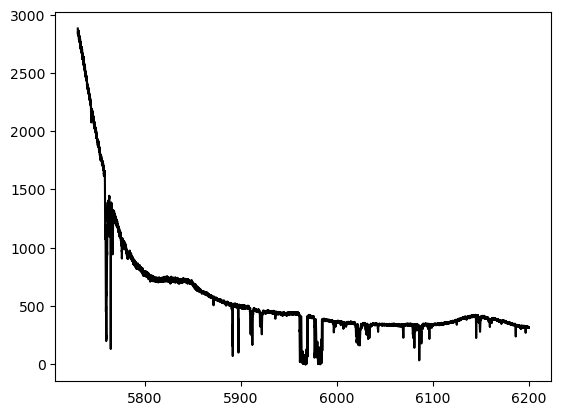

In [3]:
%matplotlib inline
wavelength, flux, error, continuum = np.loadtxt('data/quasar.dat', usecols=[0,1,2,3]).transpose()
normalised_flux = flux/continuum
c = 299792.458 # km/s
plt.plot(wavelength, flux, 'k-')
z = 5730/ls.find_line('Lya')[0]-1
print('Redshift: ', z)
plt.show()

In [47]:
10000/1548-1

5.459948320413437

## Normalised flux

(5730.019, 6199.998)

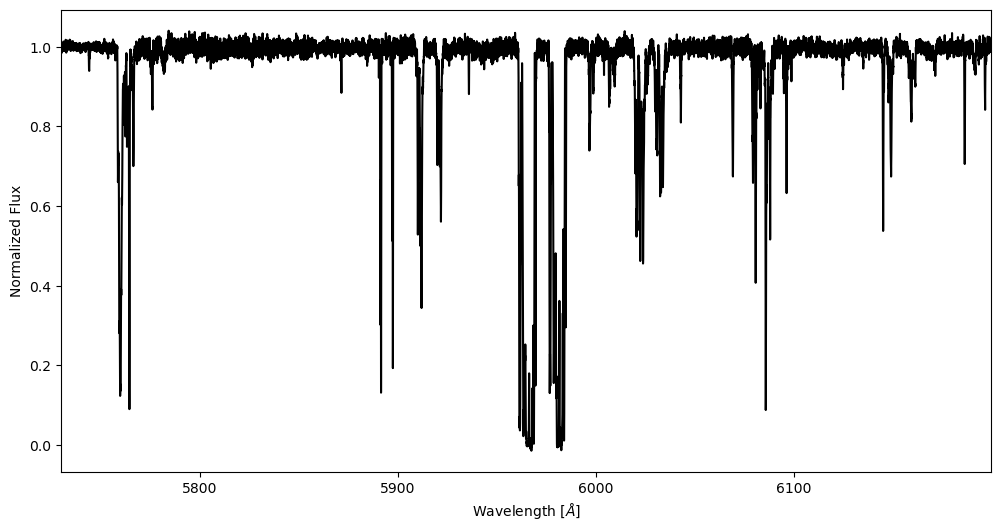

In [37]:
plt.figure(figsize=(12,6))
plt.plot(wavelength, normalised_flux, 'k-')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Normalized Flux')
plt.xlim(wavelength[0], wavelength[-1])

In [4]:
# %matplotlib widget
def zoom(a, b=None, w=200):
    if b == None:
        b = a+w/2
        a -= w/2
    plt.plot(wavelength, normalised_flux, 'k-')
    plt.xlabel('Wavelength [$\AA$]')
    plt.ylabel('Normalized Flux')
    plt.xlim(a, b)

def velocity_space(wl, w=200):
    delta_wl = wavelength-wl
    v = c*delta_wl/wavelength
    plt.plot(v, normalised_flux, 'k-')
    plt.xlabel('Velocity [km s$^{-1}$]')
    plt.ylabel('Normalized Flux')
    plt.xlim(-w, w)
    return v

def gaussian(x, A, mu, sigma): return 1-A*np.exp(-(x-mu)**2/(2*sigma**2))

def fit_gauss(xs, ys, p0=None):
    popt, pcov = curve_fit(f=gaussian, xdata=xs, ydata=ys, p0=p0, maxfev=5000)
    xFit = np.arange(min(xs)-20,max(xs)+20, 2e-4)
    return xFit, gaussian(xFit, *popt), popt

# Doublet Matching

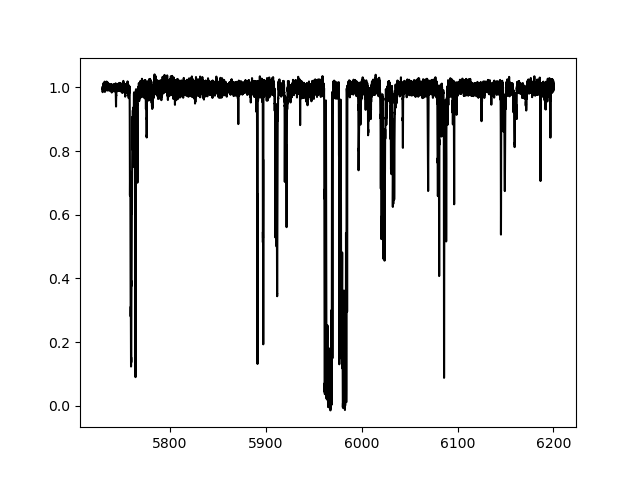

In [21]:
%matplotlib widget
plt.figure()
plt.plot(wavelength, normalised_flux, 'k-')
plt.show()

## NaI

+-----------+--------------+---------+-----------+
| Line      |   Wavelength |       f |     Gamma |
|-----------+--------------+---------+-----------|
| NaI_5897  |      5897.56 | 0.3201  | 6.139e+07 |
| NaI_5891  |      5891.58 | 0.6408  | 6.157e+07 |
| NaI_3303a |      3303.98 | 0.0046  | 9.639e+06 |
| NaI_3303b |      3303.37 | 0.0092  | 9.641e+06 |
| NaI_2853  |      2853.65 | 0.00133 | 1         |
+-----------+--------------+---------+-----------+


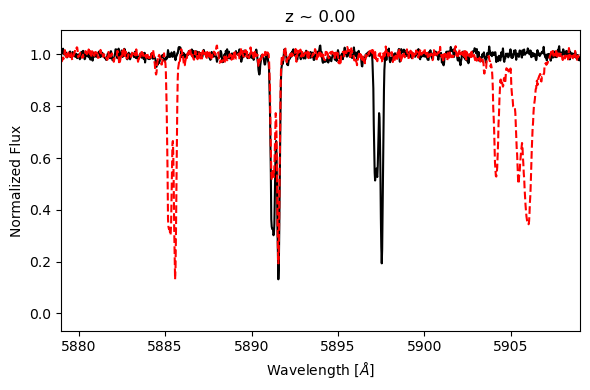

In [84]:
wls = ls.find_line('NaI')
a,b = 5891.58, 5897.56
a*(z+1)

%matplotlib inline
plt.figure(figsize=(6,4))

# plt.subplot(121)
zoom(5894, w=30)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
# plt.axvline(5891.5)
plt.title(f'z ~ {5891.58/a-1:.2f}')

# plt.subplot(122)
# zoom(6084, w=15)
# plt.plot(wavelength*(a/b), normalised_flux, 'r--')
# plt.title(f'z ~ {6084/a-1:.2f}')

plt.tight_layout()
plt.show()

## Mg II doublets

In [71]:
wls = ls.find_line('MgII')
a,b = 2796.35, 2803.53
a*(z+1)

+-----------+--------------+--------+----------+
| Line      |   Wavelength |      f |    Gamma |
|-----------+--------------+--------+----------|
| MgII_2803 |      2803.53 | 0.3058 | 2.66e+08 |
| MgII_2796 |      2796.35 | 0.6155 | 2.68e+08 |
| MgII      |      2796.35 | 0.6155 | 2.68e+08 |
+-----------+--------------+--------+----------+


13180.455371897358

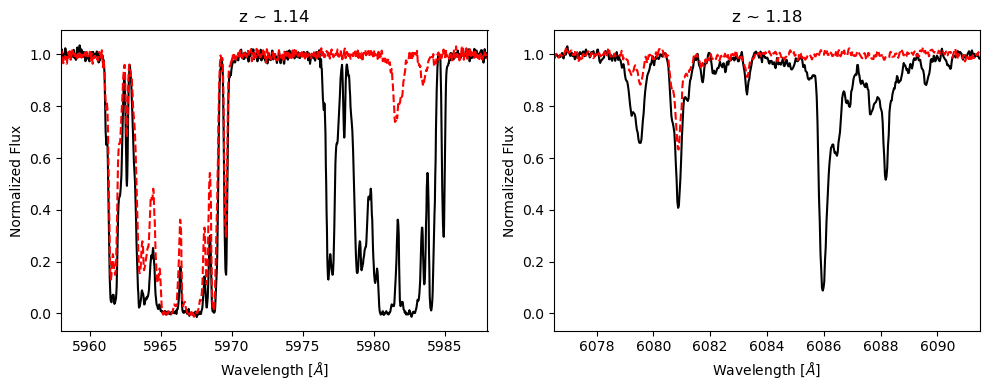

In [76]:
%matplotlib inline
plt.figure(figsize=(10,4))

plt.subplot(121)
zoom(5973, w=30)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
# plt.axvline(5766.5)
plt.title(f'z ~ {5973/a-1:.2f}')

plt.subplot(122)
zoom(6084, w=15)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
plt.title(f'z ~ {6084/a-1:.2f}')

plt.tight_layout()
plt.show()

## CIV doublets

In [67]:
a,b = 1548.2, 1550.78
a*(z+1)

7297.36299346344

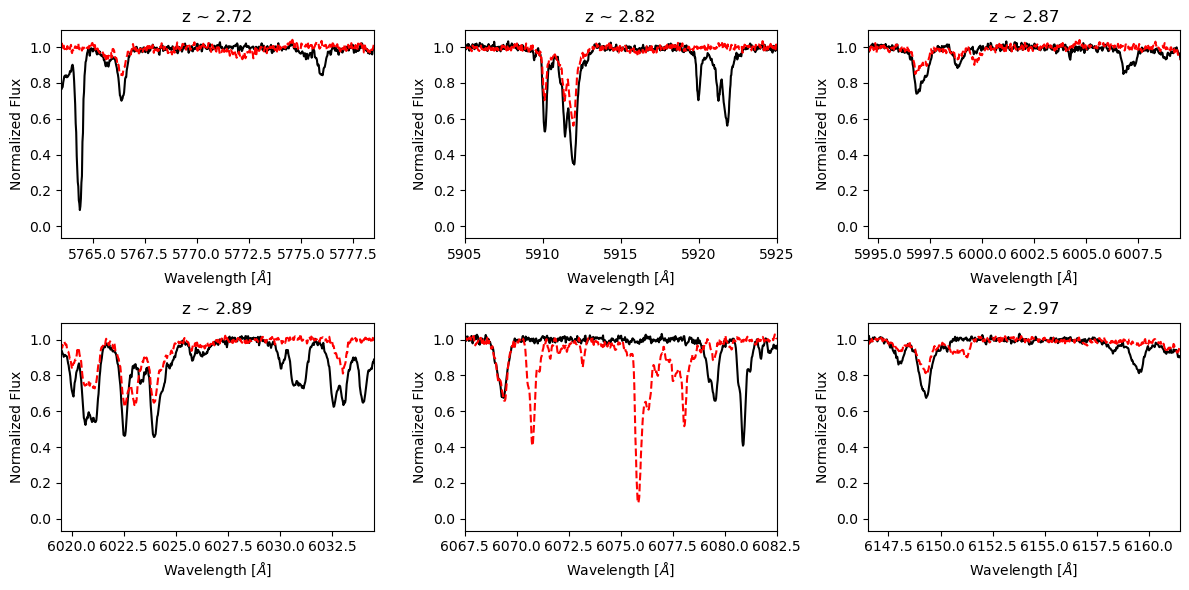

In [66]:
%matplotlib inline
plt.figure(figsize=(12,6))

plt.subplot(231)
zoom(5771, w=15)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
# plt.axvline(5766.5)
plt.title(f'z ~ {5766.5/a-1:.2f}')

plt.subplot(232)
zoom(5915, w=20)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
plt.title(f'z ~ {5910.15/a-1:.2f}')

plt.subplot(233)
zoom(6002, w=15)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
plt.title(f'z ~ {5997/a-1:.2f}')

plt.subplot(234)
zoom(6027, w=15)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
plt.title(f'z ~ {6022.5/a-1:.2f}')

plt.subplot(235)
zoom(6075, w=15)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
plt.title(f'z ~ {6069.3/a-1:.2f}')

plt.subplot(236)
zoom(6154, w=15)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
plt.title(f'z ~ {6149.33/a-1:.2f}')

plt.tight_layout()
plt.show()

In [108]:
wls = ls.find_line('CIV')
print(f'Redshift of the CIV line: {5910.15/wls[0]-1:.2f}')

+----------+--------------+---------+-----------+
| Line     |   Wavelength |       f |     Gamma |
|----------+--------------+---------+-----------|
| CIV_1548 |      1548.2  | 0.1899  | 2.642e+08 |
| CIV      |      1548.2  | 0.1899  | 2.642e+08 |
| CIV_1550 |      1550.78 | 0.09475 | 2.628e+08 |
+----------+--------------+---------+-----------+
Redshift of the CIV line: 2.82


## SiIV
A trace of SiIV found.

+-----------+--------------+-------+----------+
| Line      |   Wavelength |     f |    Gamma |
|-----------+--------------+-------+----------|
| SiIV_1402 |      1402.77 | 0.254 | 8.62e+08 |
| SiIV_1393 |      1393.76 | 0.513 | 8.8e+08  |
| SiIV      |      1393.76 | 0.513 | 8.8e+08  |
+-----------+--------------+-------+----------+
6569.417805044312


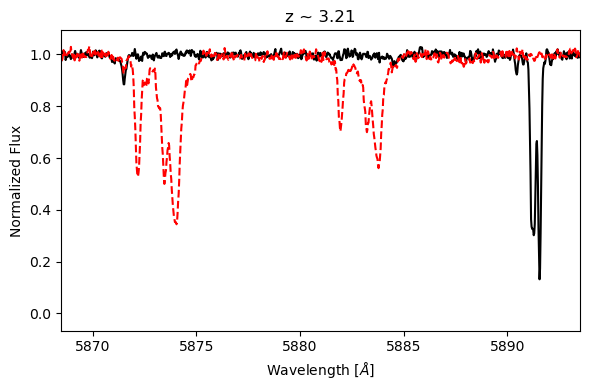

In [97]:
wls = ls.find_line('SiIV')
a, b = 1393.76, 1402.77 # SiIV
print(a*(z+1))

%matplotlib inline
plt.figure(figsize=(6,4))

zoom(5881, w=25)
plt.plot(wavelength*(a/b), normalised_flux, 'r--')
# plt.axvline(5871.5)
plt.title(f'z ~ {5871.5/a-1:.2f}')

plt.tight_layout()
plt.show()

## OVI doublets

In [98]:
wls = ls.find_line('OVI')
a, b = 1031.9261, 1037.6167 # OVI
a*(z+1)

+----------+--------------+--------+-----------+
| Line     |   Wavelength |      f |     Gamma |
|----------+--------------+--------+-----------|
| OVI_1031 |      1031.93 | 0.1325 | 4.149e+08 |
| OVI      |      1031.93 | 0.1325 | 4.149e+08 |
| OVI_1037 |      1037.62 | 0.0658 | 4.076e+08 |
+----------+--------------+--------+-----------+


4863.931878393652

# Others
No CaII, NV found.

Text(5867, 0.8, 'SiIV')

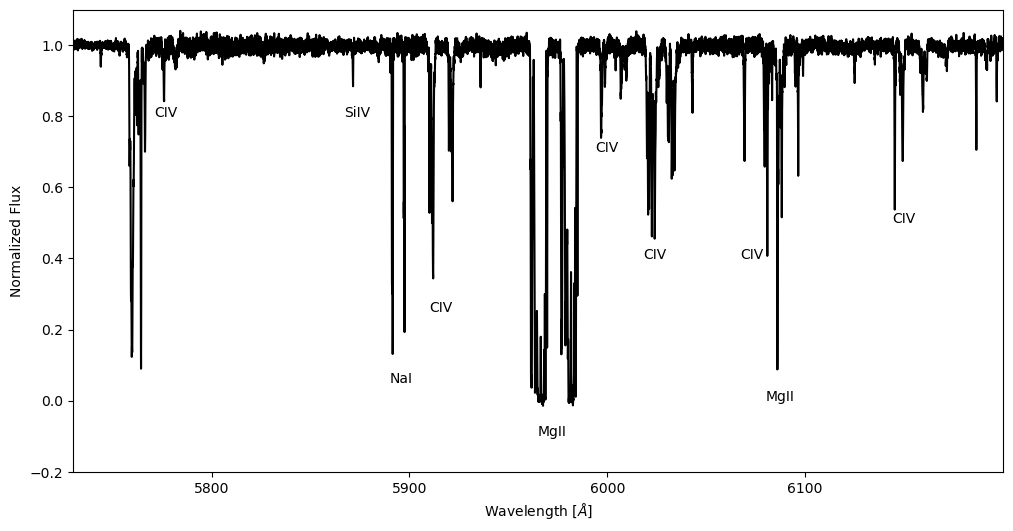

In [128]:
plt.figure(figsize=(12,6))
plt.plot(wavelength, normalised_flux, 'k-')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Normalized Flux')
plt.xlim(wavelength[0], wavelength[-1])
plt.ylim(-0.2, 1.1)
plt.text(5965, -0.1, 'MgII')
plt.text(6080, 0, 'MgII')
plt.text(5890, 0.05, 'NaI')
plt.text(5771, 0.8, 'CIV')
plt.text(5910, 0.25, 'CIV')
plt.text(5994, 0.7, 'CIV')
plt.text(6018, 0.4, 'CIV')
plt.text(6067, 0.4, 'CIV')
plt.text(6144, 0.5, 'CIV')
plt.text(5867, 0.8, 'SiIV')

# Fitting

Here, the voight profile is the real part of the Faddeeva function, $e^{-z^2}\text{erfc}(-iz)$

In [ ]:
from scipy.ndimage import gaussian_filter1d
def voight(x, x0, sigma, gamma):
    return 1-np.real(wofz((x - x0 + 1j*gamma)/sigma/np.sqrt(2))) #/ sigma /np.sqrt(2*np.pi)

def broaden(x, x0, sigma, gamma, kernel):
    return gaussian_filter1d(voight(x, x0, sigma, gamma), kernel)

def fit_profile(wl, w=150):
    v = velocity_space(wl)
    roi = np.where((v < w) & (v > -w))
    xs, ys = v[roi], savgol_filter(normalised_flux, 25, 5)[roi]
    
    params, cov = curve_fit(broaden, xs, ys, p0=[0, 15, 1, np.mean(error_array[roi])], sigma=error_array[roi], absolute_sigma=True)
    fit_x = np.linspace(xs[0], xs[-1], 200)
    # print(params)
    fit_y = broaden(fit_x, *params)

    # redo delta lambda
    v = velocity_space(params[1])
    plt.plot(fit_x, fit_y, 'b-')
    plt.plot(v, normalised_flux, 'k-')
    # plt.ylim(np.min(ys)-0.1, 1.05)
    # plt.xlim(-w, w)
    # plt.show()

    b = np.sqrt(2)*params[1]
    return b, params[2]


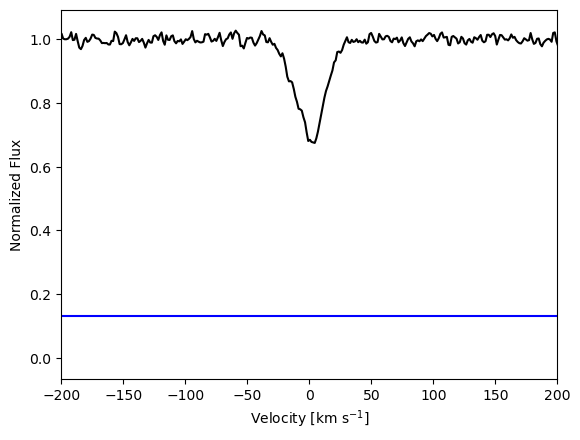

In [45]:
%matplotlib inline
# zoom(6070, w=50)
# velocity_space(6070)

error_array = error/continuum
b, damping_param = fit_profile(6069.3, w=200)
# error, error_array
# plt.plot(wavelength, error_array)
# delta_wl = wavelength-6069.3
# v = c*delta_wl/wavelength
# plt.plot(v, savgol_filter(normalised_flux, 25, 5), 'b-')
# plt.plot(v, normalised_flux, 'k-')
# plt.xlim(-200, 200)
# plt.ylim(0.7-0.1, 1.05)


Fitting the CIV line.

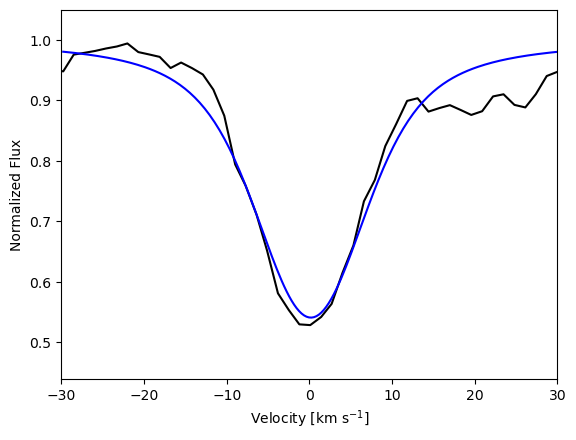

In [39]:
# zoom(5910, w=10)
# plt.axvline(5910.15)
b, damping_param = fit_profile(5910.15, w=30)